### I created this notebook to study and understand the optical spring effect in Fabry-Perot cavities. </br>
#### The objective is to figure out a way to determine the spring constant for a given cavity.

In [42]:
import finesse
finesse.configure(plotting=True)
opt_spr=finesse.Model()
opt_spr.parse("""
    l l1 P=3
    s s1 l1.p1 Min.p1 L=1

    # The cavity
    m Min R=0.9937 L=0
    s scav Min.p2 Mend.p1 L=1
    m Mend R=1 L=0 phi=-0.048  # Roughly 40kHz detuning

    # Suspend mirrors on pendula
    pendulum sus1 Min.mech mass=0.25 fz=1  Qz=1000
    pendulum sus2 Mend.mech mass=0.25 fz=1 Qz=1000

    # Apply a `force signal' to the end mirror
    fsig(1)
    sgen force Mend.mech.F_z

    # we want to measure the longitudinal motion signal of both mirrors
    xd Mend_z Mend.mech.z
    xd Min_z Min.mech.z

    xaxis(fsig.f, log, 0.1, 1k, 3000)

""")

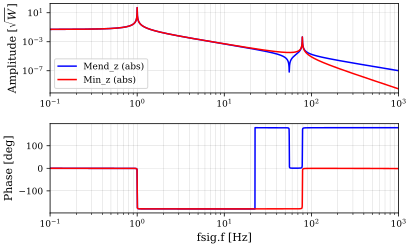

{finesse.detectors.motion_detector.MotionDetector: <Figure size 576x355.968 with 2 Axes>,
 'Mend_z': <Figure size 576x355.968 with 2 Axes>,
 'Min_z': <Figure size 576x355.968 with 2 Axes>}

In [43]:
out=opt_spr.run()
out.plot(log=True)